# Text Localization with EAST 

 This notebook is an example of using EAST detector for detection of text in images. In my first notebook about OCR, I used Pytesseract for detection and recognition of text. Why we need EAST? Because EAST is more successful about 'localization' of text. I will use EAST and Pytesseract for detection of text in the same images and compare their results. 
 
 As always, This notebook is a collection from blogs,posts and docs from internet. YOu can check reference links for original codes and images.
 
 

In [17]:
import numpy as np
import cv2
import time
from imutils.object_detection import non_max_suppression
import pytesseract
from pytesseract import Output

In [3]:
def east_detect(image):
    layerNames = [
        "feature_fusion/Conv_7/Sigmoid",
        "feature_fusion/concat_3"]

    orig = image.copy()

    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    (H, W) = image.shape[:2]

    # set the new width and height and then determine the ratio in change
    # for both the width and height: Should be multiple of 32
    (newW, newH) = (320, 320)

    rW = W / float(newW)
    rH = H / float(newH)

    # resize the image and grab the new image dimensions
    image = cv2.resize(image, (newW, newH))

    (H, W) = image.shape[:2]

    net = cv2.dnn.readNet(r"frozen_east_text_detection.pb")

    blob = cv2.dnn.blobFromImage(image, 1.0, (W, H),
                                 (123.68, 116.78, 103.94), swapRB=True, crop=False)

    start = time.time()

    net.setInput(blob)

    (scores, geometry) = net.forward(layerNames)

    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []
    # loop over the number of rows
    for y in range(0, numRows):
        # extract the scores (probabilities), followed by the geometrical
        # data used to derive potential bounding box coordinates that
        # surround text
        scoresData = scores[0, 0, y]
        xData0 = geometry[0, 0, y]
        xData1 = geometry[0, 1, y]
        xData2 = geometry[0, 2, y]
        xData3 = geometry[0, 3, y]
        anglesData = geometry[0, 4, y]
        #print(anglesData)

        for x in range(0, numCols):
            # if our score does not have sufficient probability, ignore it
            # Set minimum confidence as required
            if scoresData[x] < 0.5:
                continue
            # compute the offset factor as our resulting feature maps will
            #  x smaller than the input image
            (offsetX, offsetY) = (x * 4.0, y * 4.0)
            # extract the rotation angle for the prediction and then
            # compute the sin and cosine
            angle = anglesData[x]
            #print(angle)
            cos = np.cos(angle)
            sin = np.sin(angle)
            # use the geometry volume to derive the width and height of
            # the bounding box
            h = xData0[x] + xData2[x]
            w = xData1[x] + xData3[x]
            # compute both the starting and ending (x, y)-coordinates for
            # the text prediction bounding box
            endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
            endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
            startX = int(endX - w)
            startY = int(endY - h)
            # add the bounding box coordinates and probability score to
            # our respective lists
            rects.append((startX, startY, endX, endY))
            confidences.append(scoresData[x])

    boxes = non_max_suppression(np.array(rects), probs=confidences)
    # loop over the bounding boxes
    for (startX, startY, endX, endY) in boxes:
        # scale the bounding box coordinates based on the respective
        # ratios
        startX = int(startX * rW)
        startY = int(startY * rH)
        endX = int(endX * rW)
        endY = int(endY * rH)

        # draw the bounding box on the image
        cv2.rectangle(orig, (startX, startY), (endX, endY), (0, 255, 0), 2)

    print(time.time() - start)
    return orig,boxes,rW,rH


In [20]:
image = cv2.imread(r"j.jpg")
image=cv2.resize(image,(800,600))
(origH,origW)=image.shape[:2]
out_image,boxes,rW,rH = east_detect(image)
img_bgr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for (startX, startY, endX, endY) in boxes:
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)

    dX = int((endX - startX) * 0.15)
    
    dY = int((endY - startY) * 0.05)
    

    # apply padding to each side of the bounding box, respectively
    startX = max(0, startX - dX)
    startY = max(0, startY - dY)
    endX = min(origW, endX + (dX * 2))
    endY = min(origH, endY + (dY * 2))
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
    
cv2.imshow('EAST',image)
cv2.waitKey(0)

0.16064786911010742


-1

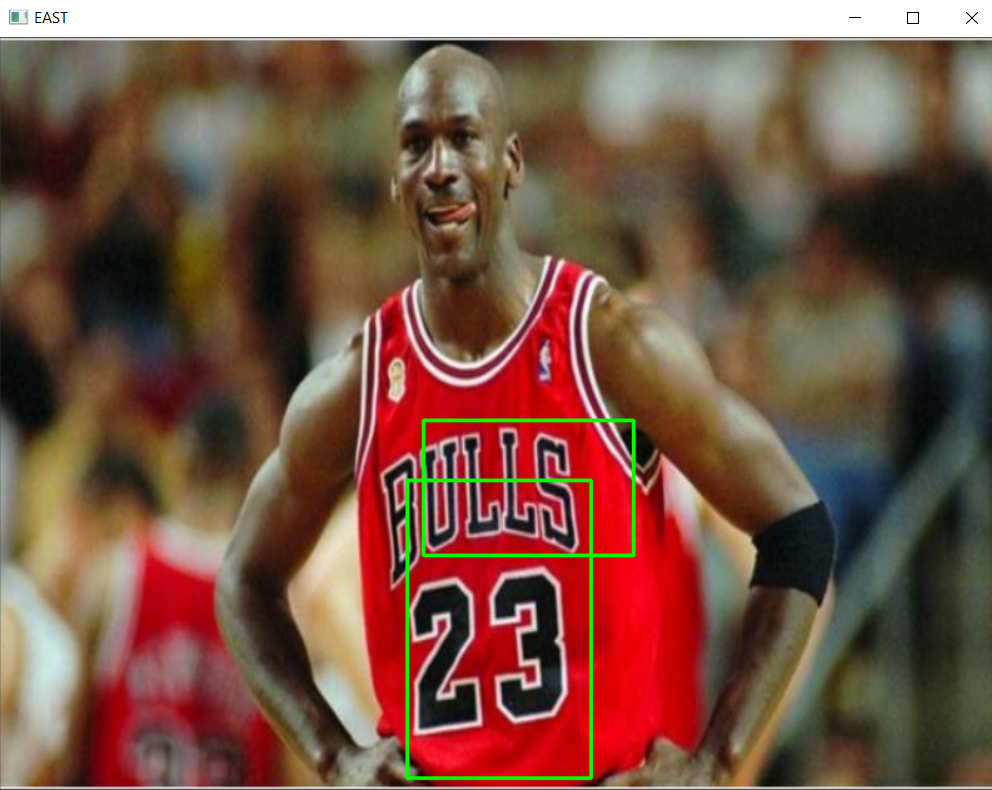

In [21]:
image = cv2.imread(r"ga.jpg")
image=cv2.resize(image,(800,600))
(origH,origW)=image.shape[:2]
out_image,boxes,rW,rH = east_detect(image)
img_bgr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for (startX, startY, endX, endY) in boxes:
    startX = int(startX * rW)
    startY = int(startY * rH)
    endX = int(endX * rW)
    endY = int(endY * rH)

    dX = int((endX - startX) * 0.15)
    
    dY = int((endY - startY) * 0.05)
    

    # apply padding to each side of the bounding box, respectively
    startX = max(0, startX - dX)
    startY = max(0, startY - dY)
    endX = min(origW, endX + (dX * 2))
    endY = min(origH, endY + (dY * 2))
    cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)
    
cv2.imshow('EAST',image)
cv2.waitKey(0)

0.20137429237365723


-1

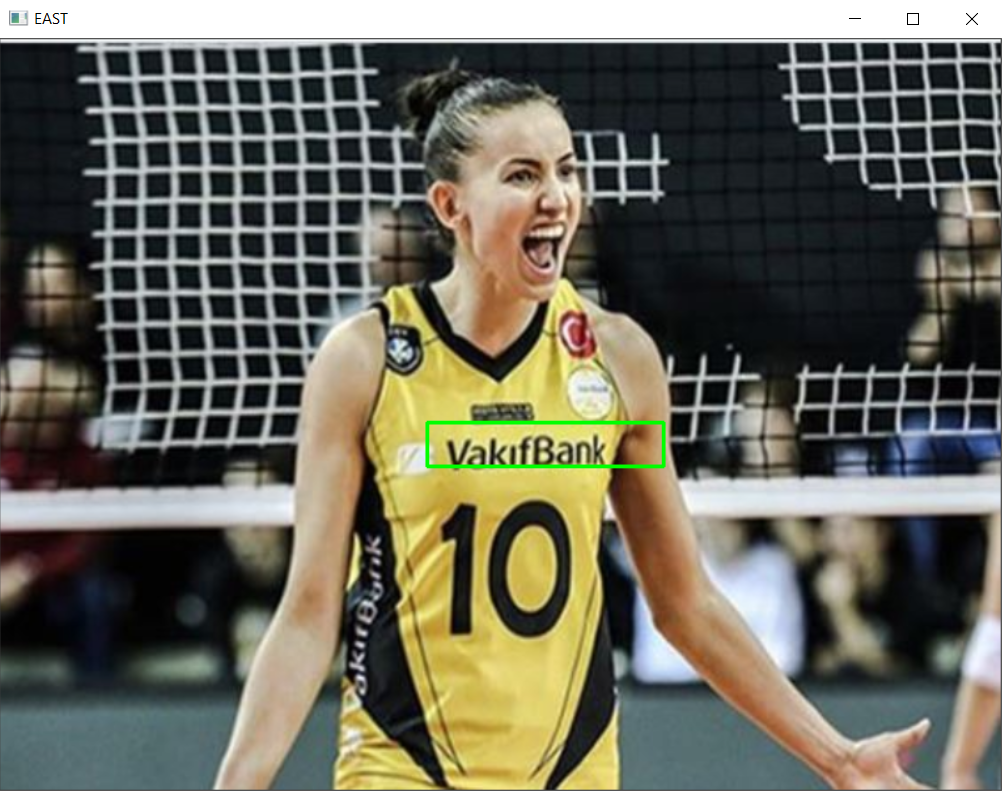

In [23]:
image = cv2.imread(r"ga.jpg")
image=cv2.resize(image,(800,600))
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print(d)
number_boxes = len(d['text'])
for i in range(number_boxes):
    #only pick boxes with a confidence > 60%
    if int(float(d['conf'][i])) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.imshow('PYTESSERACT',image)
cv2.waitKey(0)

{'level': [1, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1], 'left': [0, 0, 0, 0, 0], 'top': [0, 0, 0, 0, 0], 'width': [800, 800, 800, 800, 800], 'height': [600, 600, 600, 600, 600], 'conf': ['-1', '-1', '-1', '-1', '95.000000'], 'text': ['', '', '', '', '']}


-1

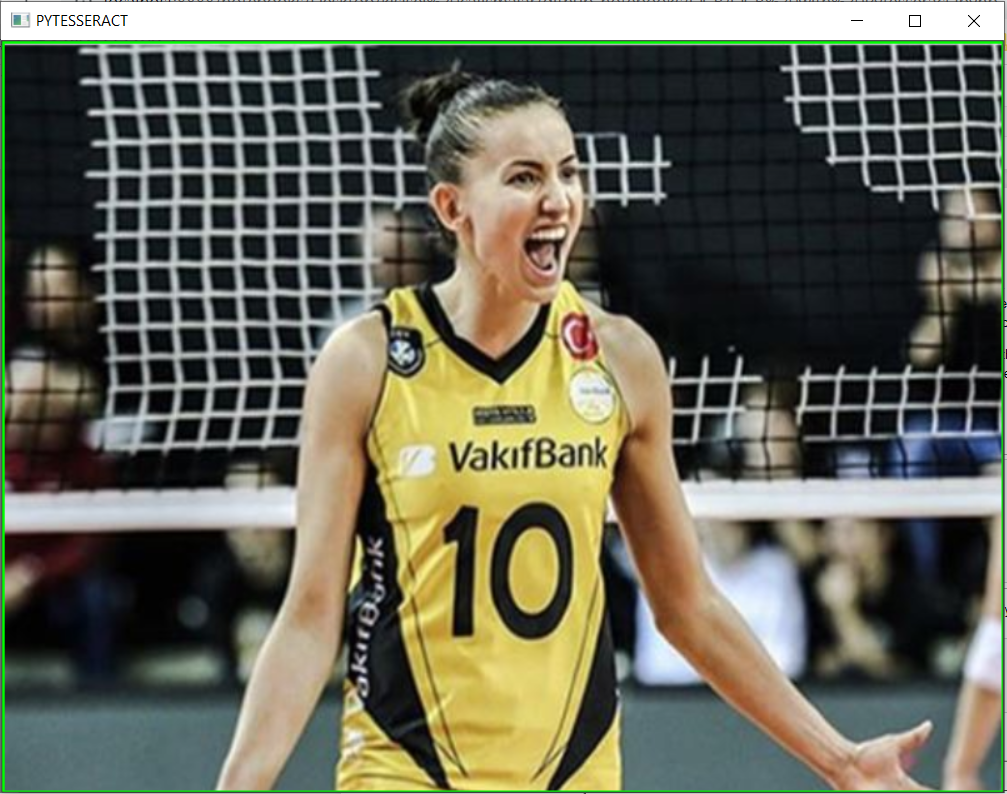

In [24]:
image = cv2.imread(r"j.jpg")
image=cv2.resize(image,(800,600))
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print(d)
number_boxes = len(d['text'])
for i in range(number_boxes):
    #only pick boxes with a confidence > 60%
    if int(float(d['conf'][i])) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.imshow('PYTESSERACT',image)
cv2.waitKey(0)

{'level': [1], 'page_num': [1], 'block_num': [0], 'par_num': [0], 'line_num': [0], 'word_num': [0], 'left': [0], 'top': [0], 'width': [800], 'height': [600], 'conf': ['-1'], 'text': ['']}


-1

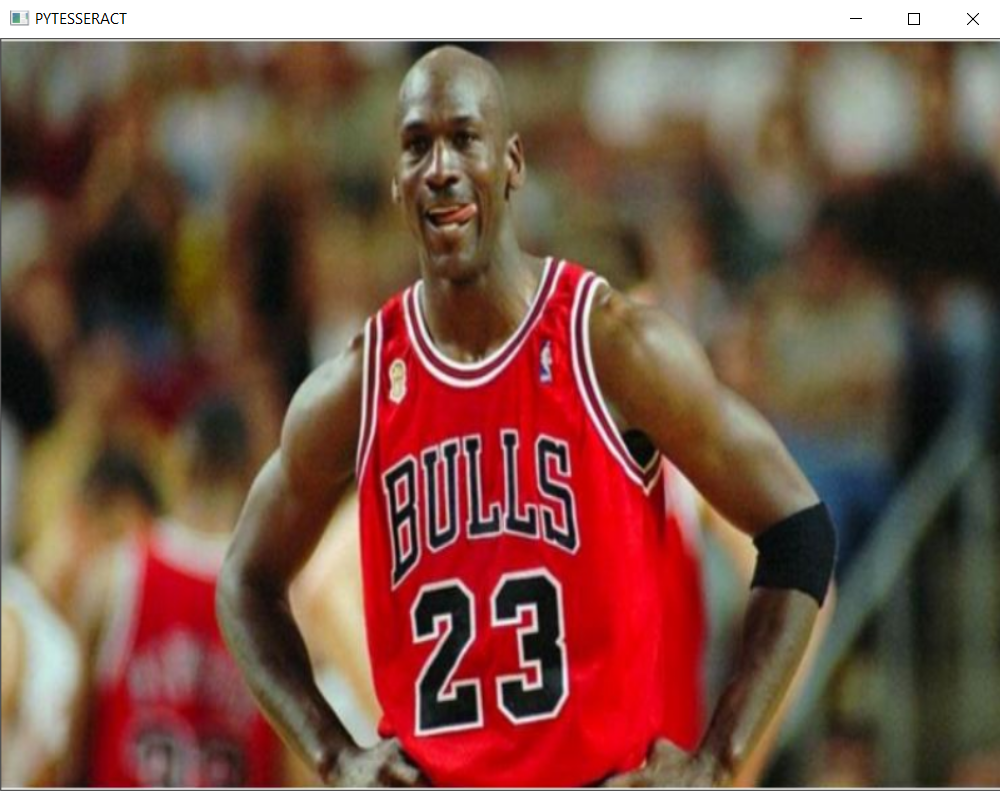



I applied EAST detection to the images and it predicted bounding box where could be text. When I used Pytesseract to detect text in the same images, the results of Pytesseract is not very successful. Of course we can have more successful results by changing the comfiguration options of pytesseract. But at the first sight, Using EAST can be a better choice for detecting the location of text in an image.

Unfortunately, EAST can not recognize text. Because of that reason , for a strong OCR, Using EAST for detection text and using pytesseract for recognition the text can be a good solution. 

This notebook is just a basic example to show 'There is a detection model for OCR'. For detailed info you can check the reference links. 


REFERENCE LINKS :

* https://pyimagesearch.com/2018/08/20/opencv-text-detection-east-text-detector/?_ga=2.224016987.137545911.1655435468-1130789896.1638882117

* https://medium.com/technovators/scene-text-detection-in-python-with-east-and-craft-cbe03dda35d5 

* https://nanonets.com/blog/ocr-with-tesseract/ 

In [ ]:
#want to try east detection on webcam

cap=cv2.VideoCapture(0)
while True:
    (grapped,frame)=cap.read()
    (origH,origW)=frame.shape[:2]
    out_image,boxes,rW,rH = east_detect(frame)
    img_bgr = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    for (startX, startY, endX, endY) in boxes:
        startX = int(startX * rW)
        startY = int(startY * rH)
        endX = int(endX * rW)
        endY = int(endY * rH)

        dX = int((endX - startX) * 0.05)
        dY = int((endY - startY) * 0.15)
    
        startX = max(0, startX - dX)
        startY = max(0, startY - dY)
        endX = min(origW, endX + (dX * 2))
        endY = min(origH, endY + (dY * 2))
        cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)
    
    cv2.imshow("Image", frame)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q"):
        break

        
cap.release()
cv2.destroyAllWindows()